✅ 图片已加载 | 分辨率: 1624x1240
正在尝试 4 种 Bayer 解码模式...
✅ 显示结果窗口，请人工判断哪一张颜色正常。


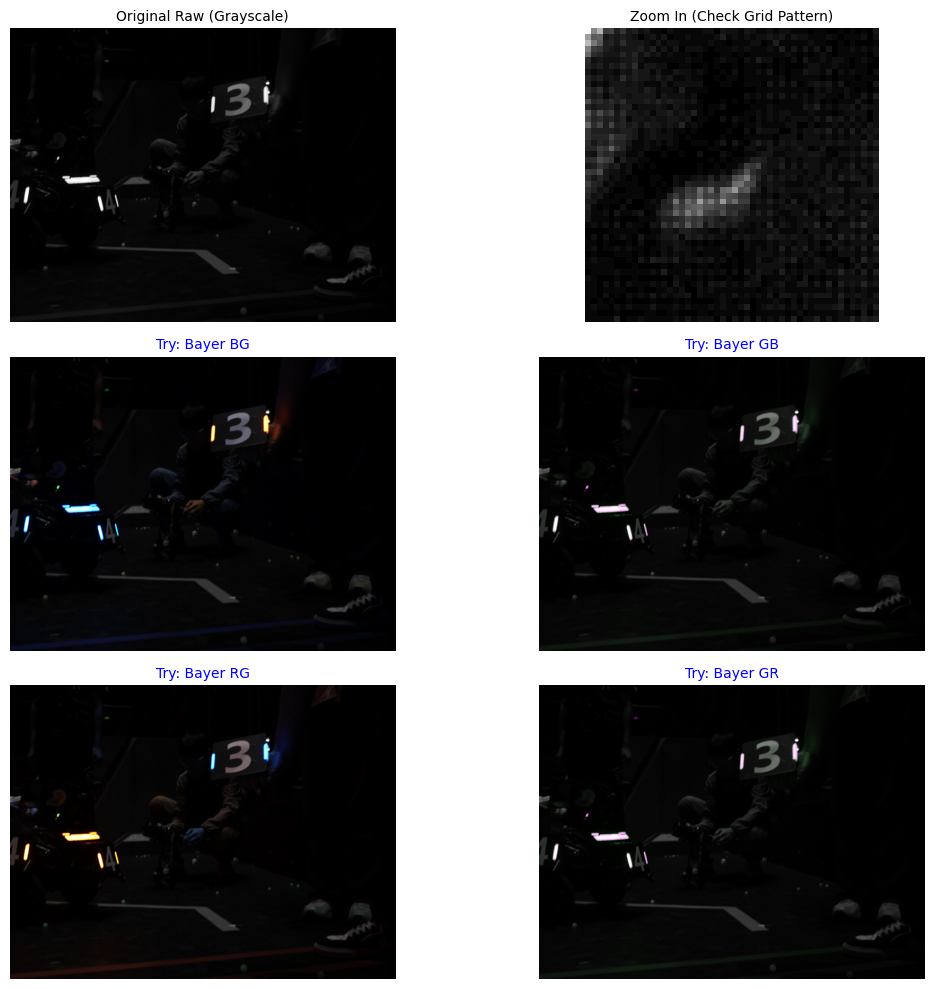

In [6]:
import cv2
import matplotlib.pyplot as plt

def test_bayer_patterns(image_path):
    # 1. 【关键】以灰度模式读取
    # 如果不加 cv2.IMREAD_GRAYSCALE，OpenCV 会把它当做普通黑白图处理，就没法转码了
    bayer_raw = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if bayer_raw is None:
        print(f"❌ 无法读取文件: {image_path}")
        return

    print(f"✅ 图片已加载 | 分辨率: {bayer_raw.shape[1]}x{bayer_raw.shape[0]}")
    print("正在尝试 4 种 Bayer 解码模式...")

    # 2. 尝试 4 种不同的 Bayer 排列模式
    # 注意：OpenCV 读取的是 BGR 顺序，所以我们转成 RGB 给 Matplotlib 显示
    
    # 模式 1: BGGR (常见)
    try:
        rgb_bg = cv2.cvtColor(bayer_raw, cv2.COLOR_BayerBG2RGB)
    except:
        rgb_bg = bayer_raw # 防报错
        
    # 模式 2: GBRG
    try:
        rgb_gb = cv2.cvtColor(bayer_raw, cv2.COLOR_BayerGB2RGB)
    except:
        rgb_gb = bayer_raw

    # 模式 3: RGGB (常见)
    try:
        rgb_rg = cv2.cvtColor(bayer_raw, cv2.COLOR_BayerRG2RGB)
    except:
        rgb_rg = bayer_raw

    # 模式 4: GRBG
    try:
        rgb_gr = cv2.cvtColor(bayer_raw, cv2.COLOR_BayerGR2RGB)
    except:
        rgb_gr = bayer_raw

    # 3. 使用 Matplotlib 显示对比图
    plt.figure(figsize=(12, 10))

    # 子图 1: 原始数据 (看起来像灰度)
    plt.subplot(3, 2, 1)
    plt.title("Original Raw (Grayscale)", fontsize=10)
    plt.imshow(bayer_raw, cmap='gray')
    plt.axis('off')

    # 子图 2: 局部放大 (查看是否有马赛克网格)
    # 取图像中心 50x50 的区域放大
    h, w = bayer_raw.shape
    cy, cx = h // 2, w // 2
    zoom_crop = bayer_raw[cy:cy+50, cx:cx+50]
    
    plt.subplot(3, 2, 2)
    plt.title("Zoom In (Check Grid Pattern)", fontsize=10)
    plt.imshow(zoom_crop, cmap='gray')
    plt.axis('off')

    # 子图 3-6: 四种转换结果
    patterns = [
        ("Bayer BG", rgb_bg),
        ("Bayer GB", rgb_gb),
        ("Bayer RG", rgb_rg),
        ("Bayer GR", rgb_gr)
    ]

    for i, (name, img) in enumerate(patterns):
        plt.subplot(3, 2, i + 3)
        plt.title(f"Try: {name}", fontsize=10, color='blue')
        plt.imshow(img)
        plt.axis('off')

    plt.tight_layout()
    print("✅ 显示结果窗口，请人工判断哪一张颜色正常。")
    plt.show()

if __name__ == "__main__":
    # ==========================
    # 在这里输入你的 BMP 文件路径
    image_path = "/home/wangfeng/RM2026/amor_data/competation/5-24/3/images_0524_1608/0524_160840_4457_16.bmp" 
    # ==========================
    
    test_bayer_patterns(image_path)